# COMP9033 - Data Analytics Lab 03: Visual data analysis
## Introduction

This week's lab provides a practical introduction to visual data analysis. At the end of the lab, you should be able to use pandas to:

- Import CSV data with multiple indices.
- Make a bar chart.
- Make a pie chart.
- Make a histogram.
- Make a scatter plot matrix.

As you will see later, pandas provides a lot of different options for plotting data and we only have time to look at a few in detail. If you're interested, you can find more information on plotting [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

### The Iris flower data set

This week, we'll be using data from the [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), a well-known data set in the world of data analysis. The data set consists of 150 samples taken from three different species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*; 50 samples each). In each case, the length and width (in centimeters) of the Iris' [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal) were measured. The purpose of the lab is to perform some exploratory visual analysis on the data to see what we can learn.

### Getting started

Let's start by making sure that plots are displayed inline by issuing the *magic command* `%matplotlib inline` and importing pandas in the usual way:

In [1]:
%matplotlib inline
import pandas as pd

Next, let's load the data. Write the path to your iris.csv file in the cell below:

In [2]:
path_to_csv = "data/iris.csv"

If you open the CSV file manually (e.g. using spreadsheet software), you will see that it contains six columns: four describe the measurements of the data (i.e. the sepal and petal widths and lengths), while the remaining two describe the species of the data (i.e. *Iris setosa*, *Iris virginica* or *Iris versicolor*) and the index number of the sample, which ranges from 1 to 50 for each species.

If we index the measurement data using both the species and sample number information, we can refer to individual measurements per species. Fortunately, with pandas, this is easily done using the same `read_csv` command we used last week. The only difference this time is that we must pass a list of column names (in order) to use as the index.

> **Note:** Last week, we passed `index_col='year'`, so that we could index the baby name information in the data frame by year. This week, we'll use the same `index_col` argument, but instead pass a list of strings to use as indices, i.e. `index_col=['index_1', 'index_2', ..., 'index_n']`.

Execute the cell below to load the data into a pandas data frame and index that data frame by the `species` and `sample_number` columns:

In [3]:
df = pd.read_csv(path_to_csv, index_col=['species', 'sample_number'])

Let's take a closer look at the data we've just loaded. We can start by using the `head` method to take a peak at the first few rows:

In [4]:
df.head()

sepal_length  sepal_width  petal_length  petal_width
species sample_number                                                      
setosa  1                       5.1          3.5           1.4          0.2
        2                       4.9          3.0           1.4          0.2
        3                       4.7          3.2           1.3          0.2
        4                       4.6          3.1           1.5          0.2
        5                       5.0          3.6           1.4          0.2

As you can see, we now have two index columns on the left side of the data frame: `species` and `sample_number`.

## Exploratory data analysis
### Summary statistics

Let's pick up where we left off in the last lab and compute some summary statistics. We can do this the same way we did last week, using the `describe` method, like this:

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This is good, but what if we want to see data relating to a specific species? This is where our index helps. Because we indexed the data frame using both species and sample numbers, we can reference all the data for a single species by indexing into the data frame using just that species name. For instance, to compute summary statistics for *Iris setosa* alone, we can write:

In [6]:
df.ix['setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


As you can see, the summary for *Iris setosa* counts just fifty values, rather than the 150 values in the summary of the entire data frame.

What about comparing statistics across different species? Again, with pandas, this is easy. Last week, we saw that pandas has several methods for computing statistics for data frames, e.g. [`mean`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html#pandas.DataFrame.mean), [`median`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html#pandas.DataFrame.median), [`min`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html#pandas.DataFrame.min), [`max`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html#pandas.DataFrame.max) and [`std`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html#pandas.DataFrame.std). Each of these methods accepts an optional `level` argument, which refers to the level of the index you want to compute the function on. For instance, to compute the mean of each sepal and petal length and width for each species, we can write:

In [7]:
df.mean(level='species')

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Here, we've set `level='species'` because we have two index columns: `species` and `sample_number`. If the `level` argument is not specified, calling `mean` on a data frame has the effect of computing the mean of each column across *all* indices:

In [8]:
df.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

So why bother learning methods like `mean`, `median` and `std` when we can just call `describe` to get a complete summary? One reason is because the `describe` method does not accept a `level` argument and so calls to it will compute statistics for *all* of the data in the data frame, unless we index into the data frame first with a specific index reference (like we did earlier when computing a summary for *Iris setosa*).

Another reason is that calling these specific instance methods allows us to make further calls to pandas built-in visualisation methods. Let's take a look at some of these in more detail next.

### Visual analysis

Manually examining tables of numerical values can be an exhausting experience. For instance, when we computed the mean sepal and petal widths and lengths for each species earlier, we ended up with a table of numbers, which doesn't provide much immediate insight into how these quantities vary over species without us having to manually compare the contents of each cell. In cases like this, using a visual technique can be a much better option because it gives us an immediate intuitive sense of what's going on. Let's take a look at a few commonly used techniques next.

#### Bar charts

Most of pandas plotting functionality is contained in the [`plot`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method of the data frame, which is itself a wrapper for the matplotlib plotting library. To compute a bar chart of some data, all we need to do is call the `plot` method on it with the optional argument `kind='bar'` to specify that we want a bar chart.

> **Note:** If `kind` is not specified, then `plot` defaults to a line plot.

For instance, to create a bar chart of the mean value of each column in our data frame, all we need to do is call `mean` on the data frame and then call `plot` on the output of our call to `mean` (remembering to set `kind='bar'` too!), like this:

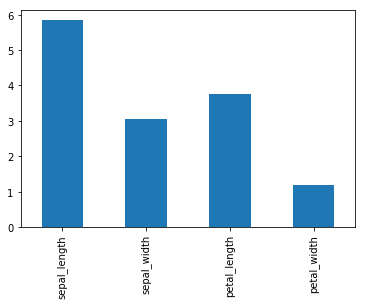

In [9]:
df.mean().plot(kind='bar')

But what if we want to visualise how these quantities vary across species? Easy! All we need to do is pass `level='species'` to the `mean` method, like earlier:

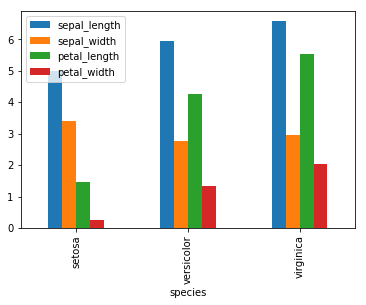

In [10]:
df.mean(level='species').plot(kind='bar')

We can also produce stacked bar charts, by passing the optional argument `stacked=True`, like in the cell below:

> **Note:** By default, if it is not specified, `stacked=False`.

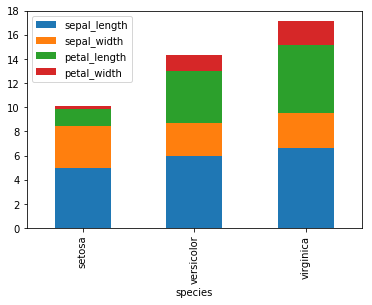

In [11]:
df.mean(level=0).plot(kind='bar', stacked=True)

We can also make the bar chart horizontal rather than vertical by setting `kind='barh'`, like this:

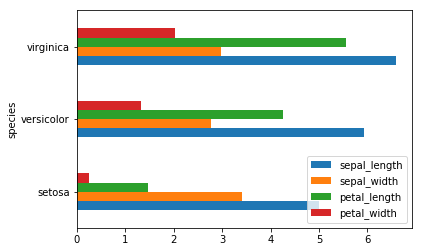

In [14]:
df.mean(level=0).plot(kind='barh')

> **Note:** pandas provides *lots* of options for plotting. You can find a comprehensive list (with sample code) [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

We now have a visual representation of the mean values of each sepal and petal measurement across each species. We don't need to worry about creating a chart legend, choosing bar colours or labelling our $x$ axis - pandas (via matplotlib) does this all automatically.

##### Legend positioning

Sometimes, legends can obscure areas of our visualisations where we want to see detail. For instance, in the last chart above, the legend is blocking the bar representing the average sepal length of *Iris setosa*. We can move the legend to a new location by calling the [`legend`](http://matplotlib.org/1.3.1/api/pyplot_api.html#matplotlib.pyplot.legend) method on the output of the `plot` command, like this:

In [3]:
df.mean(level=0).plot(kind='bar').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

NameError: name 'df' is not defined

Here, the `loc` argument specifies a point on the box containing the legend data (in our case, the `center` point of the `left` hand side of the box), while the `bbox_to_anchor` argument specifies the location (in relative (x, y) coordinates) of a point on the boundary box of the chart (i.e. the frame around the chart area) to anchor the selected location to. In this case, we have anchored the `center left` point of the legend box to the point `(1.0, 0.5)` on the boundary box, i.e. the point which is 100% of the way along the $x$ direction of the boundary box and 50% of the way along the $y$ direction of the boundary box.

Unfortunately, the syntax here isn't as nice as it could be, but this is the only way to reposition a legend. For those who are interested, a complete list of legend locations (i.e. values for `loc`) is available [here](http://matplotlib.org/1.3.1/api/pyplot_api.html#matplotlib.pyplot.legend).

#### Pie charts

At the start of this lab, the Iris data set was described as containing 150 samples in total, consisting of 50 from each species. Up until now, we haven't really questioned whether this is true, although as good data analysts we should have! Let's rectify our oversight now.

As it turns out, counting things in pandas is a pretty trivial task. All we need to do is call the [`count`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html#pandas.DataFrame.count) method of the data frame and we get a summary of the number of data points in each column:

> **Note:** If our columns have missing data (the Iris data set doesn't), then `count` will return the number of non-missing (i.e. valid) data points. We'll see this in a bit more detail next week.

In [22]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
dtype: int64

Like the `mean` method, `count` accepts a `level` argument, so we can tell pandas to count the number of non-missing data points each species for each species like this:

In [21]:
df.count(level=0)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


It's a trivial example because each of the species has an equal number of samples, but why don't we use a pie chart to visualise this data?

> **Note:** In many cases, sample categories are not evenly distributed, so examining the proportion of samples in each category is a valuble habit to form.

Creating pie charts with pandas works in a similar way to creating bar charts: we call `plot` on the data we want to visualise, passing `kind='pie'` instead of `kind='bar'` to specify the output chart type. There is one small difference though: pie charts cannot represent more than one column of data at a time, so we must tell pandas to make individual plots for each column by passing the optional argument `subplots=True`, as in the cell below:

> **Note:** While pie charts are a good technique for visualising *proportions*, they are a poor technique for visualising almost anything else!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25d1e6d810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f25d1bef2d0>], dtype=object)

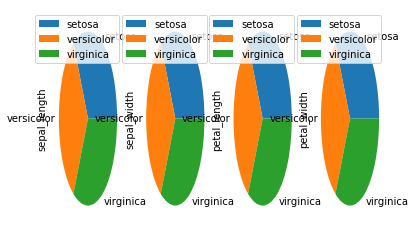

In [23]:
df.count(level='species').plot(kind='pie', subplots=True)

The pie charts look a bit squashed, right? We can fix this by passing the optional argument `figsize=(width,length)`, which adjusts the size of the chart output. For instance, to set the figure size to 16x4, we can write:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25d1b11690>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f25d1934310>], dtype=object)

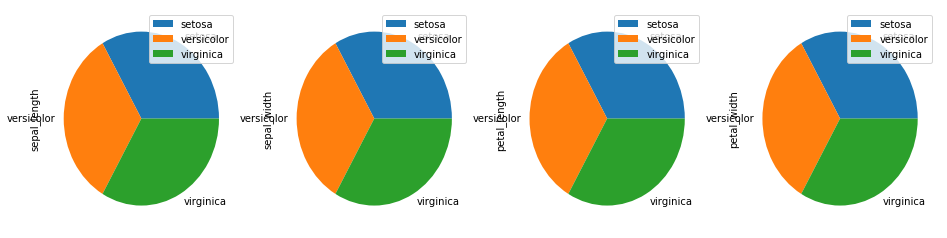

In [24]:
df.count(level='species').plot(kind='pie', subplots=True, figsize=(16,4))

> **Note:** Setting the figure size like this works for any call to pandas' `plot` method. Try adjusting the size of one the bar charts we made earlier for practice!

The pie charts above now have enough space, but their legends are taking up valuable visual real estate. We can fix this by reorganising the plots from a 4x1 grid into a 2x2 grid using the optional `layout` argument. To do this, all we need to do is pass `layout=(2,2)` to the plot command (also setting `figsize=(12,12)` to compensate for the change in size), like this:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25d184f650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f25d158e390>]], dtype=object)

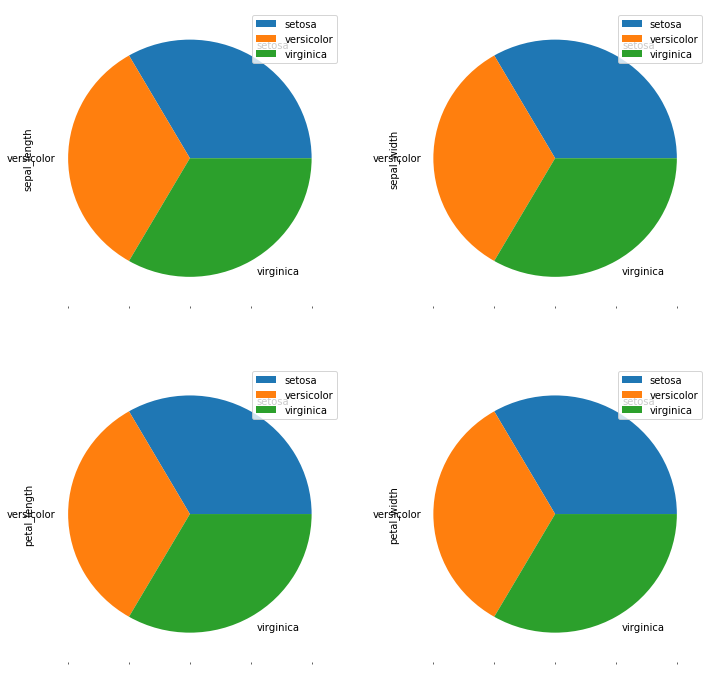

In [25]:
df.count(level=0).plot(kind='pie', subplots=True, figsize=(12,12), layout=(2,2))



#### Histograms

In lectures, we've seen how histograms can be used to visualise the distribution of the data in a sample. Again, using pandas, this is easily done using the `plot` method. The only difference this time is that we must set `kind='hist'`. For instance, to plot histograms for each column in the data frame, we can write:

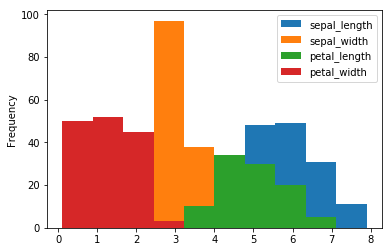

In [26]:
df.plot(kind='hist')

If we want to plot data for just one species of Iris, then we need to index into the data frame first (like we did with the `describe` method earlier), like this:

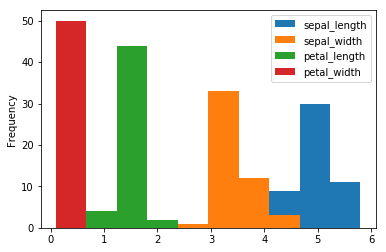

In [27]:
df.ix['setosa'].plot(kind='hist')

Like with pie charts, we can force pandas to create a plot for each variable type by specifying the options `subplots=True` and `layout=(2,2)` (the `figsize` option is also used to make sure the plots are big enough to see), like this:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25d114a3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f25d0d8a850>]], dtype=object)

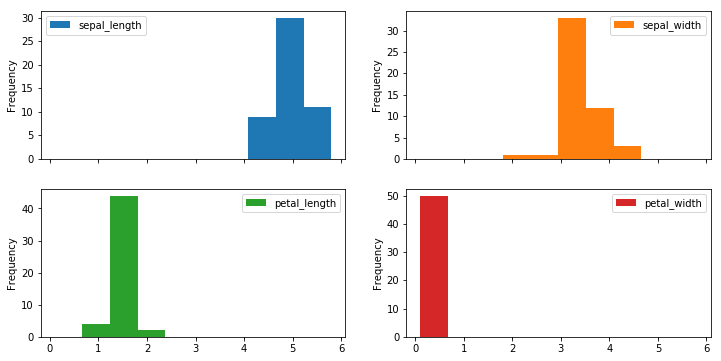

In [28]:
df.ix['setosa'].plot(kind='hist', subplots=True, layout=(2,2), figsize=(12,6))

Next, we can increase the number of bins to get some finer detail about the distributions using the `bins` argument, like this:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25d0cc5510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f25d0939ad0>]], dtype=object)

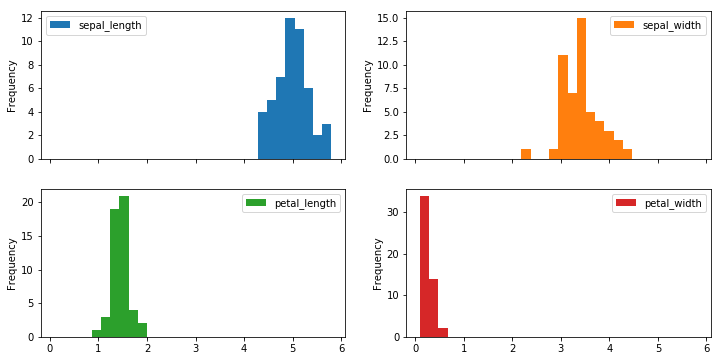

In [29]:
df.ix['setosa'].plot(kind='hist', subplots=True, layout=(2,2), figsize=(12,6), bins=30)

Try varying the number of bins to see the effect it has on the disributions. Remember, if the number of bins is too large, you'll start to get a "broken comb" look.

#### Scatter plot matrices

Creating histograms for a single species is informative, but we're missing out on the bigger picture. One of the most important aspects of exploratory data analysis is determining whether there are any relationships in your data and one of the best techniques for visualising this is the scatter plot matrix.

Before we get to building a matrix for our data, let's consider the quantitative approach first: computing correlations for each pair of variables in our data set. With pandas, this is easy - all we need to do is call the [`corr`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method on our data frame, like in the cell below, and pandas computes the Pearson correlation coefficient for each pair of variables in our data set and presents the data as a table.

In [30]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


As you can see from the data, petal length is highly positively correlated to sepal length.

> **Note:** By definition, a data sample is always completely positively correlated to itself (i.e. $r_{xx} = 1$). This is why the diagonal entries in the table above are all equal to one.

Next, let's consider the qualitative approach: in pandas, we can make a scatter plot from a data frame by passing it to pandas' [`scatter_matrix`](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot) function, like this:

> **Note:** Unlike the other methods we've covered today, `scatter_matrix` is not an option we can pass to `plot`, i.e. we cannot call `df.plot(kind='scatter_matrix')`. Instead, we must always pass the data frame to the method as in the cell below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25d0773fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f25cfdc8990>]], dtype=object)

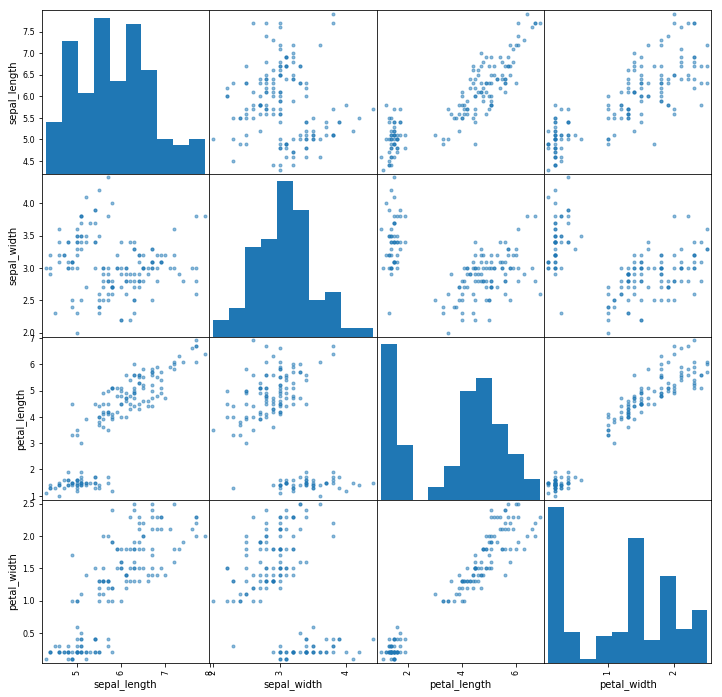

In [31]:
pd.scatter_matrix(df, figsize=(12, 12))

This is good, but the points in our scatter plot are a little small. We can change this by specifying the optional `s` argument (`s` stands for size), like this:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25d029f4d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f25cf2d12d0>]], dtype=object)

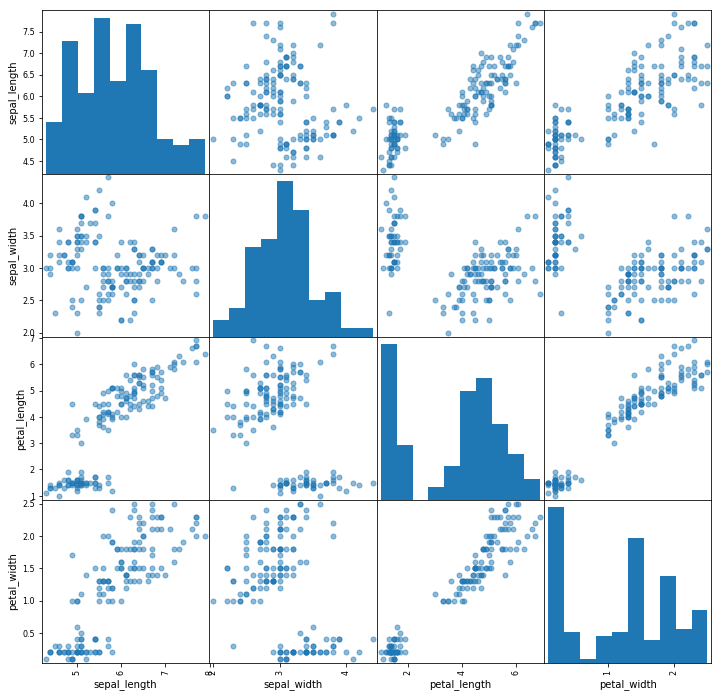

In [32]:
pd.scatter_matrix(df, figsize=(12, 12), s=100)

This is much clearer! We can now easily spot correlations visually, e.g. petal width and petal length, which will help us form hypotheses about what the final outcome of our analysis might be. For example, in this case, we might conclude that species with larger petal widths have larger petal lengths.